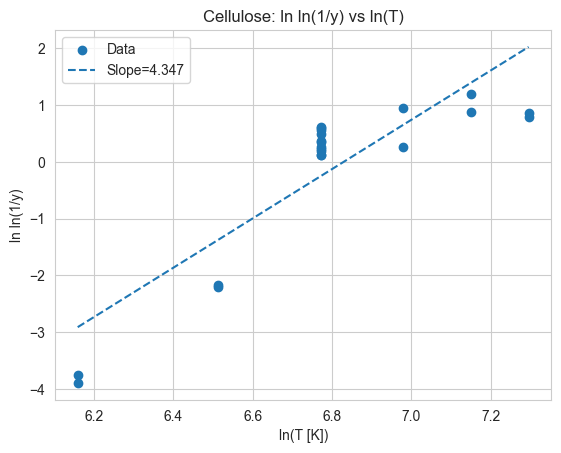

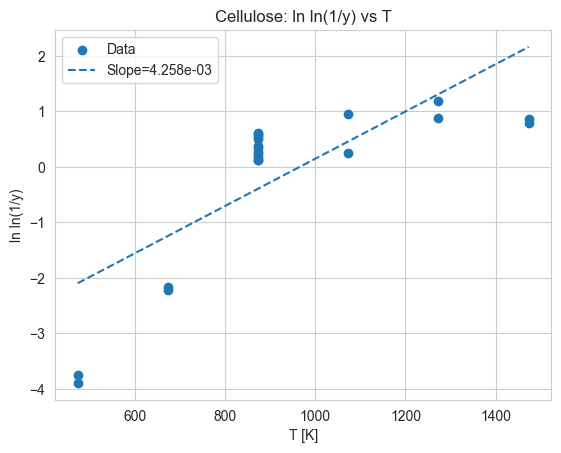

C:\Users\demir\PycharmProjects\volatile-predict\.venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8315 (\N{SUPERSCRIPT MINUS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


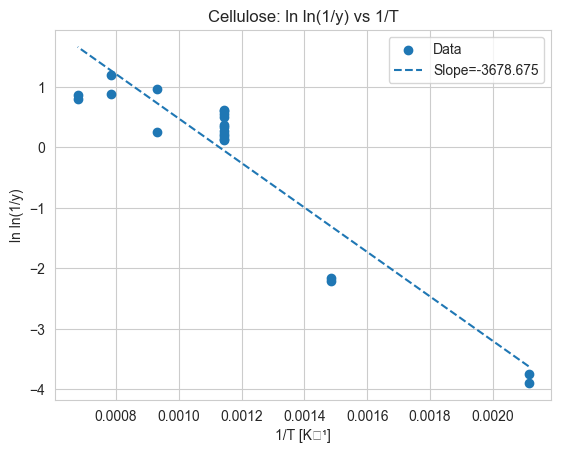

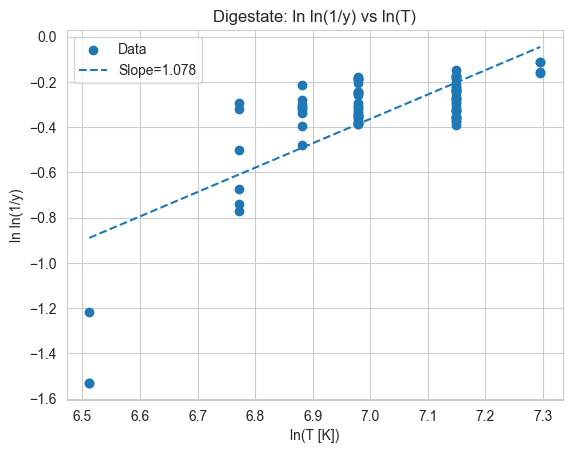

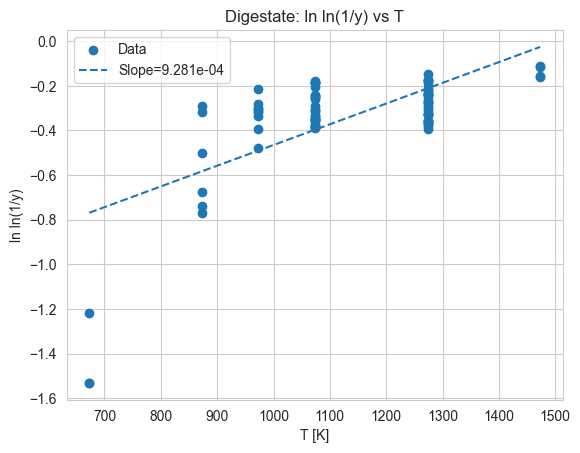

C:\Users\demir\PycharmProjects\volatile-predict\.venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8315 (\N{SUPERSCRIPT MINUS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


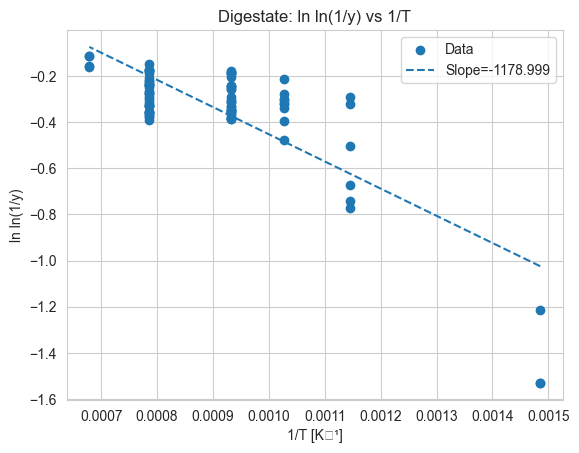

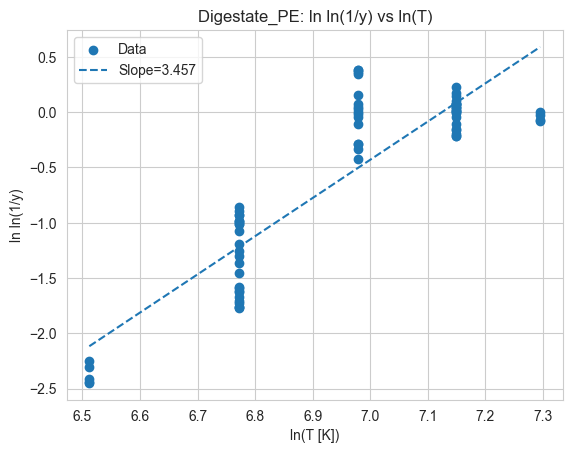

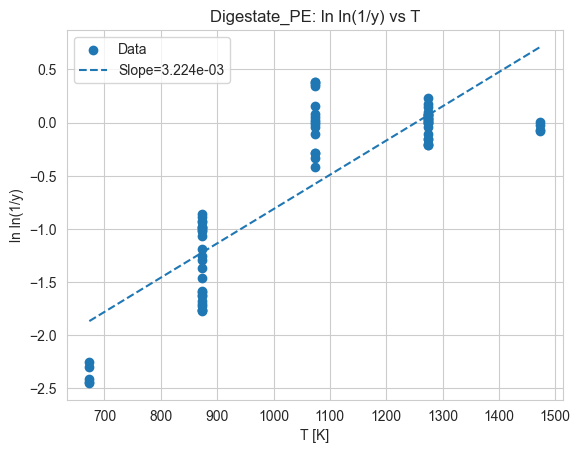

C:\Users\demir\PycharmProjects\volatile-predict\.venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8315 (\N{SUPERSCRIPT MINUS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


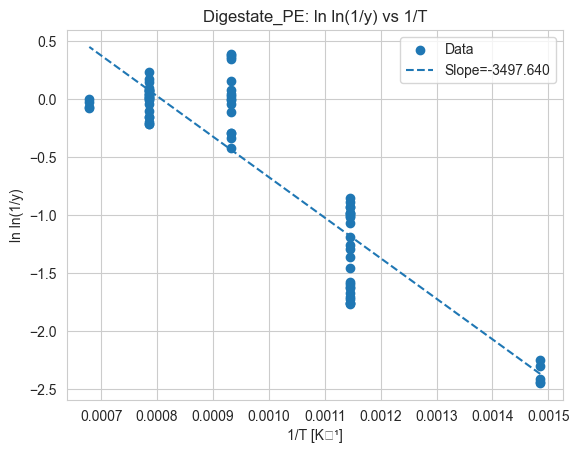

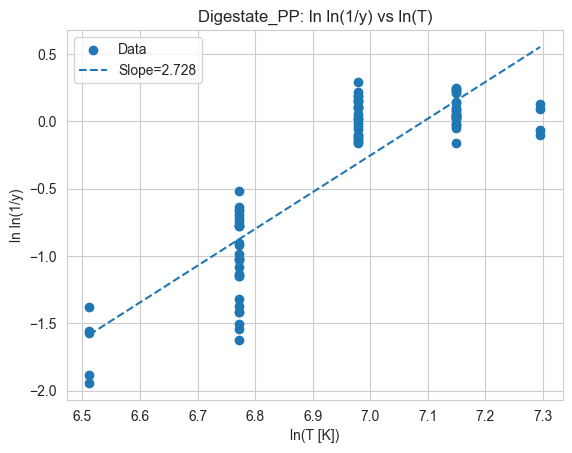

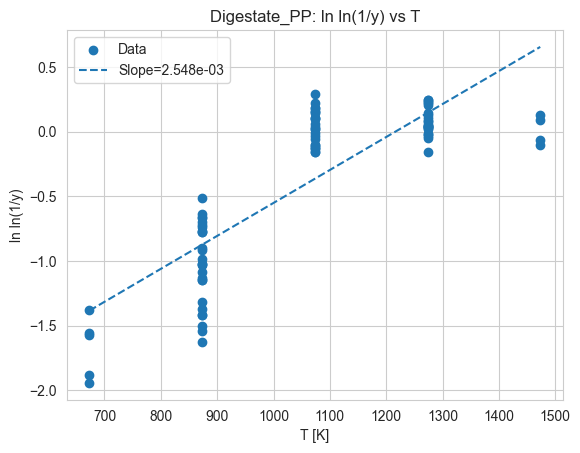

C:\Users\demir\PycharmProjects\volatile-predict\.venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8315 (\N{SUPERSCRIPT MINUS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


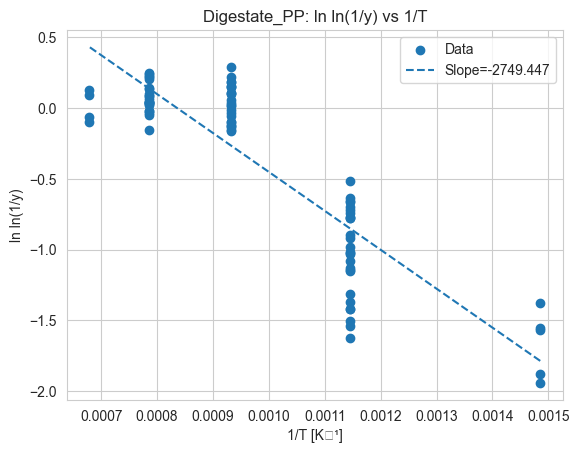

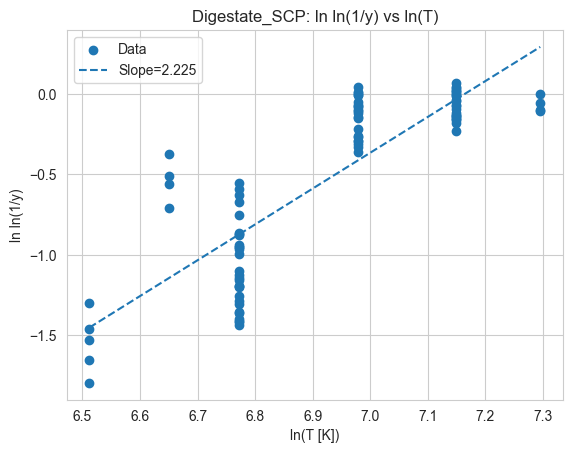

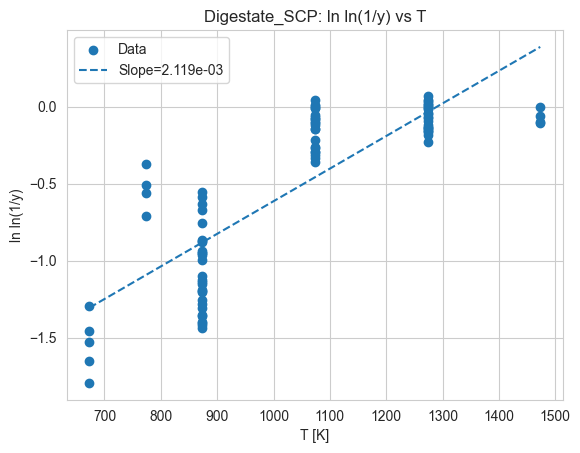

C:\Users\demir\PycharmProjects\volatile-predict\.venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8315 (\N{SUPERSCRIPT MINUS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


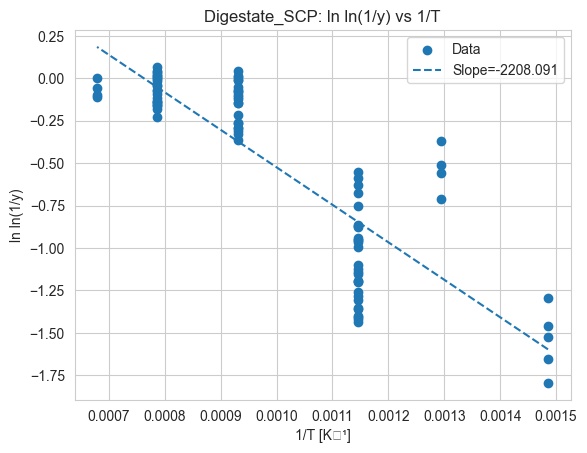

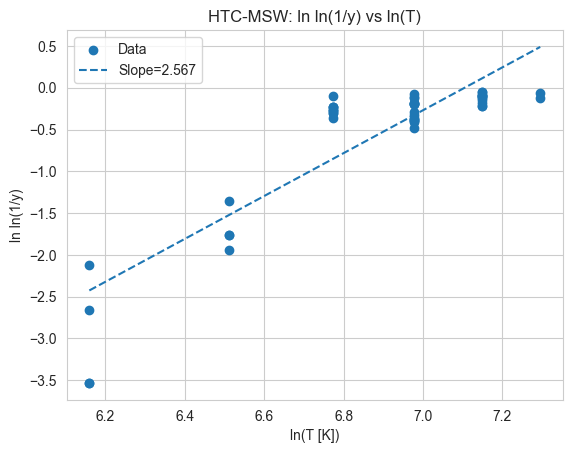

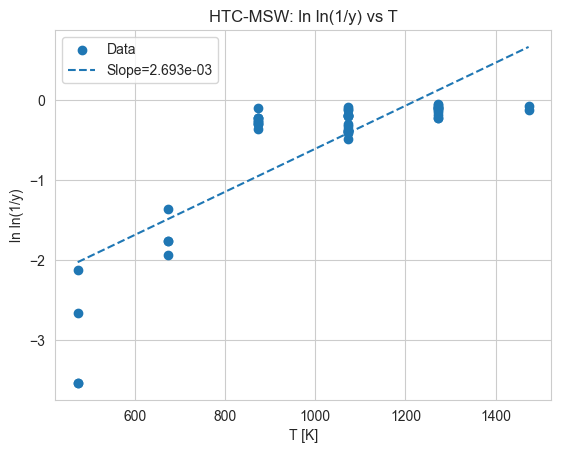

C:\Users\demir\PycharmProjects\volatile-predict\.venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8315 (\N{SUPERSCRIPT MINUS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


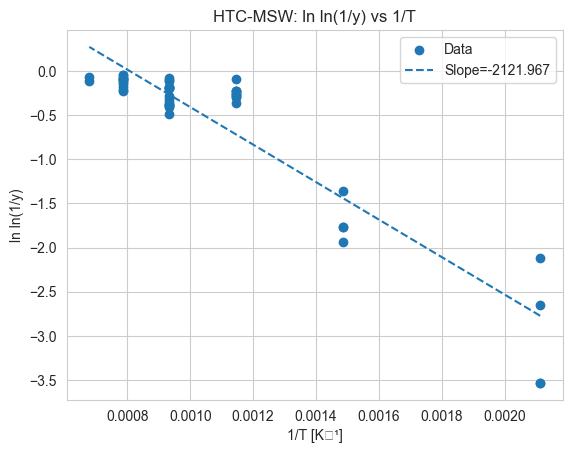

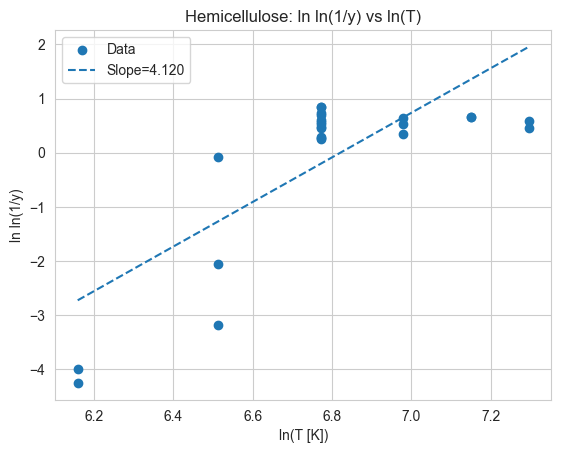

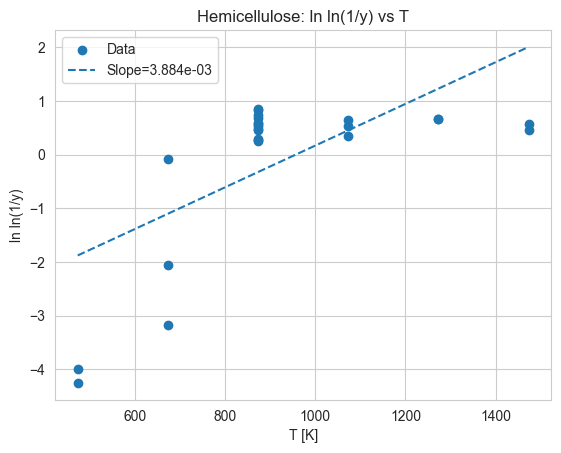

C:\Users\demir\PycharmProjects\volatile-predict\.venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8315 (\N{SUPERSCRIPT MINUS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


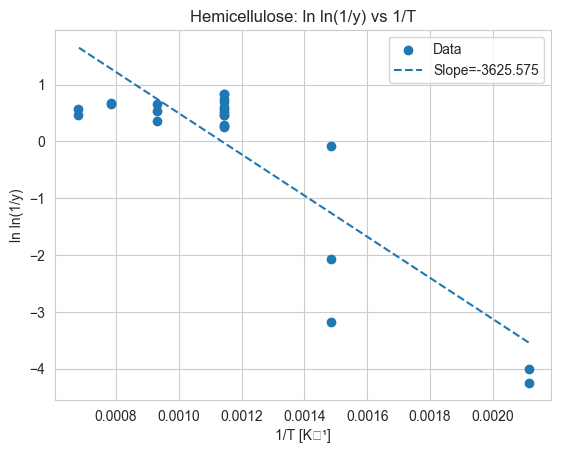

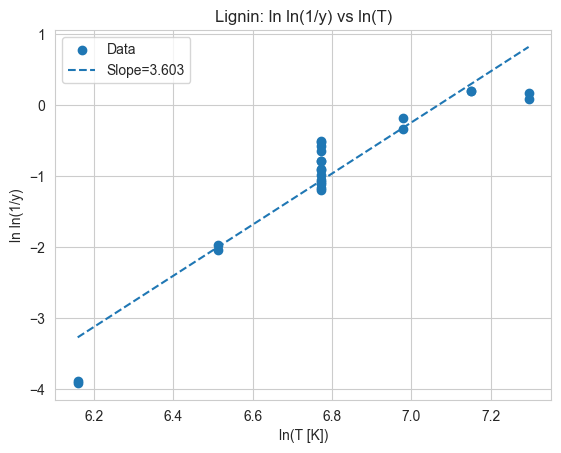

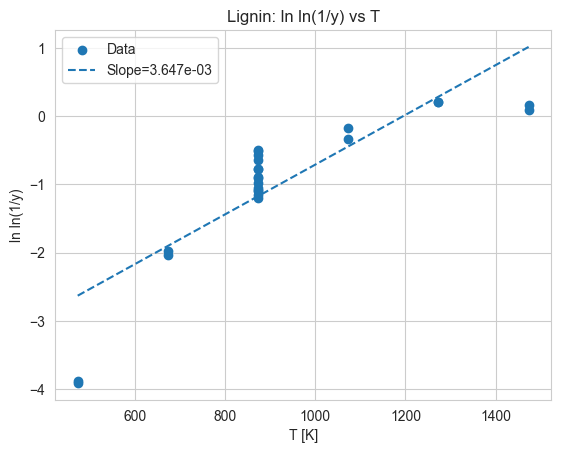

C:\Users\demir\PycharmProjects\volatile-predict\.venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8315 (\N{SUPERSCRIPT MINUS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


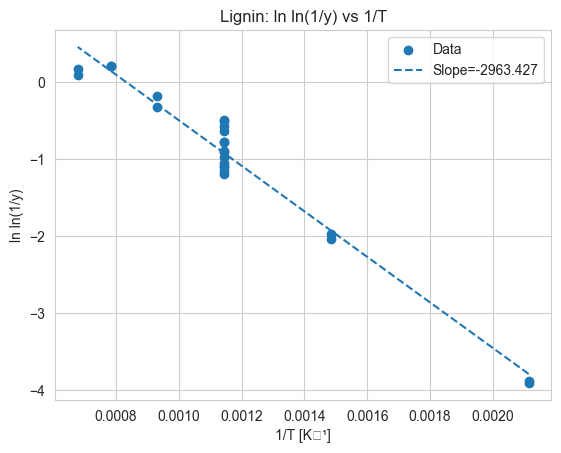

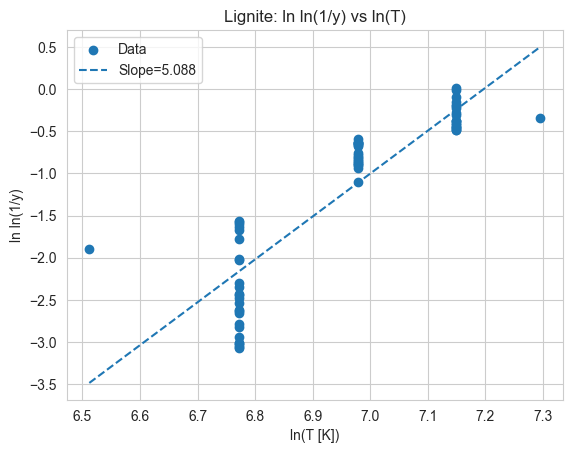

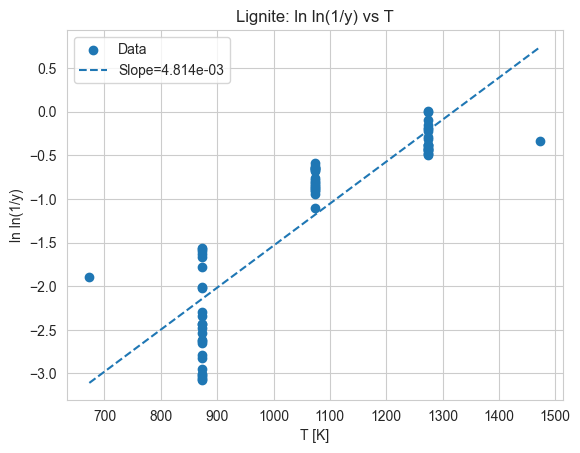

C:\Users\demir\PycharmProjects\volatile-predict\.venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8315 (\N{SUPERSCRIPT MINUS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


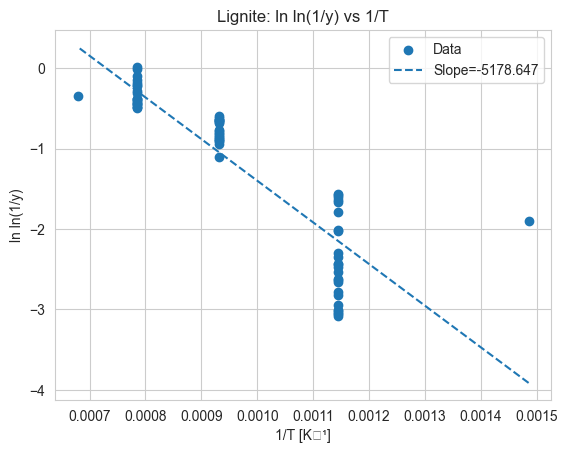

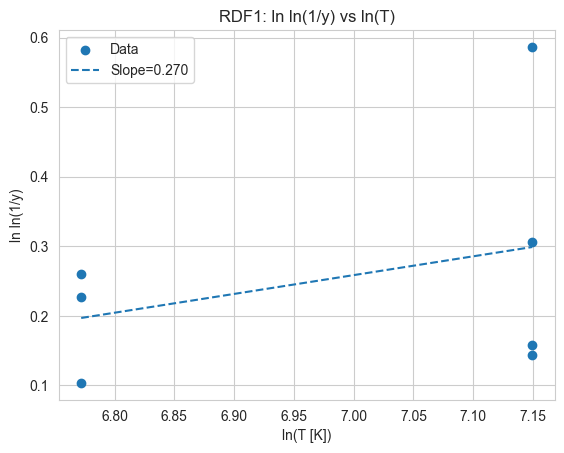

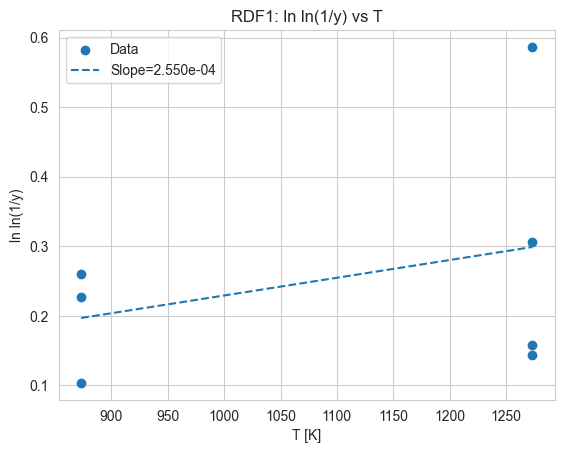

C:\Users\demir\PycharmProjects\volatile-predict\.venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8315 (\N{SUPERSCRIPT MINUS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


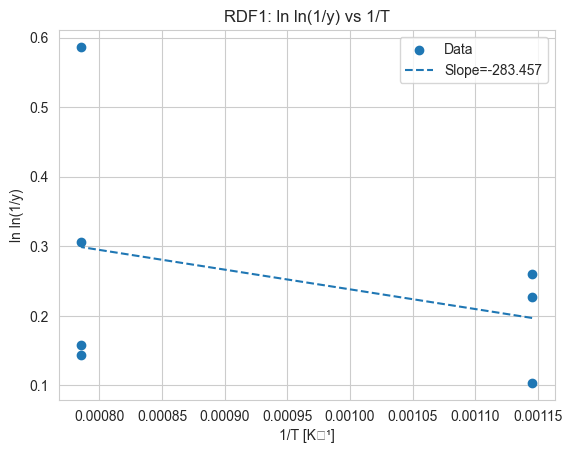

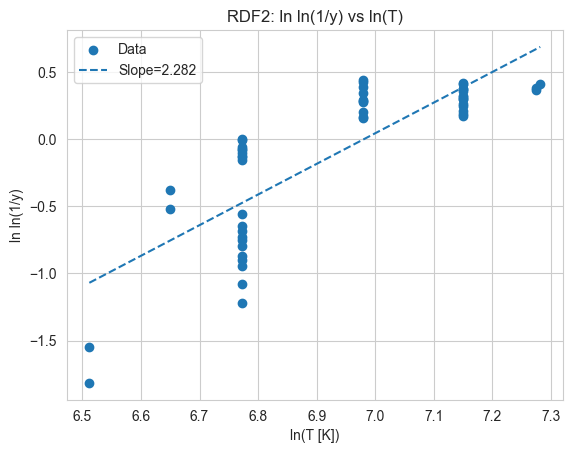

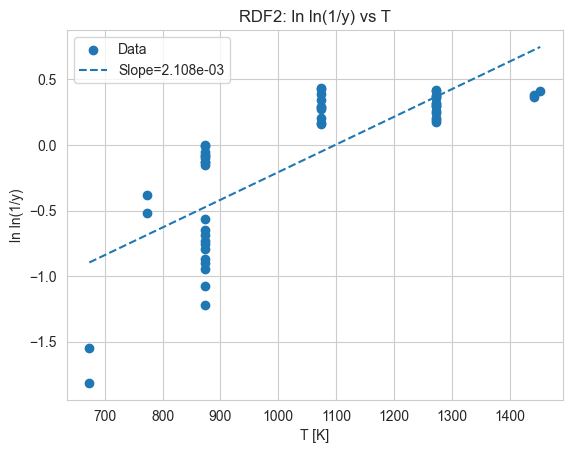

C:\Users\demir\PycharmProjects\volatile-predict\.venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8315 (\N{SUPERSCRIPT MINUS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


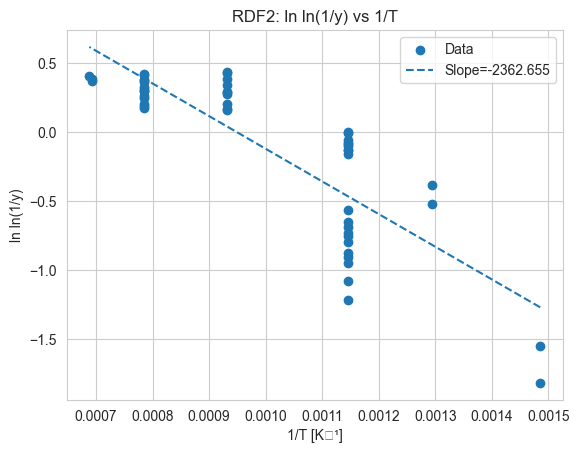

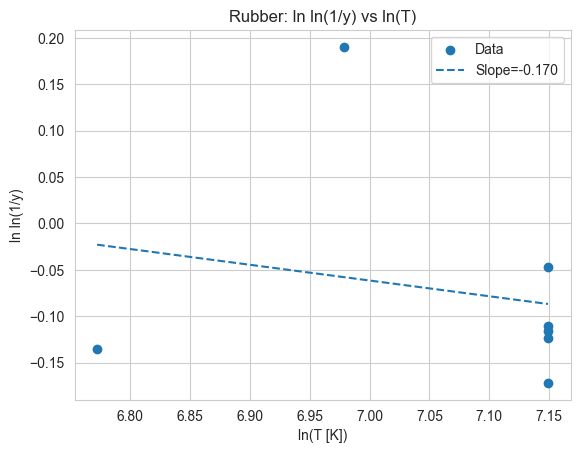

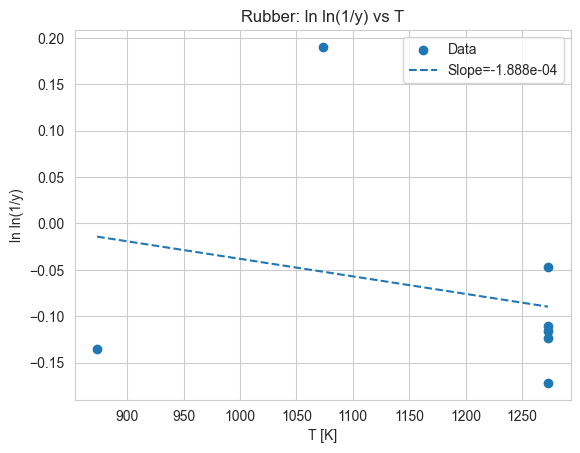

C:\Users\demir\PycharmProjects\volatile-predict\.venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8315 (\N{SUPERSCRIPT MINUS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


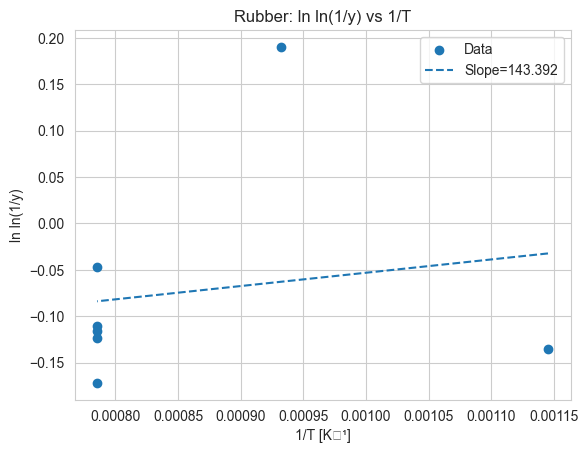

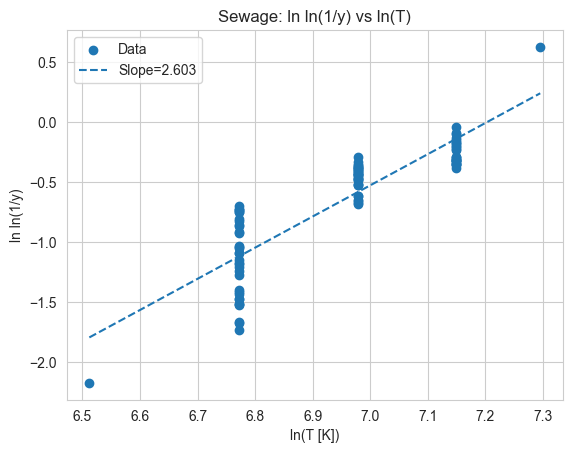

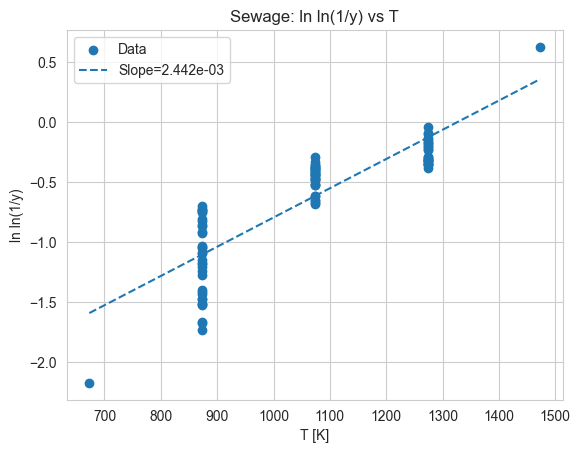

C:\Users\demir\PycharmProjects\volatile-predict\.venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8315 (\N{SUPERSCRIPT MINUS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


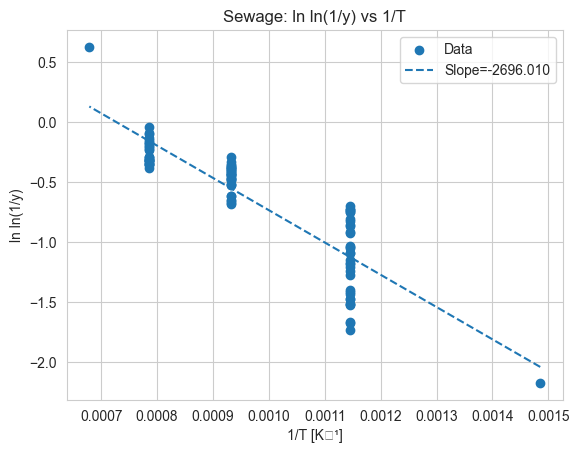

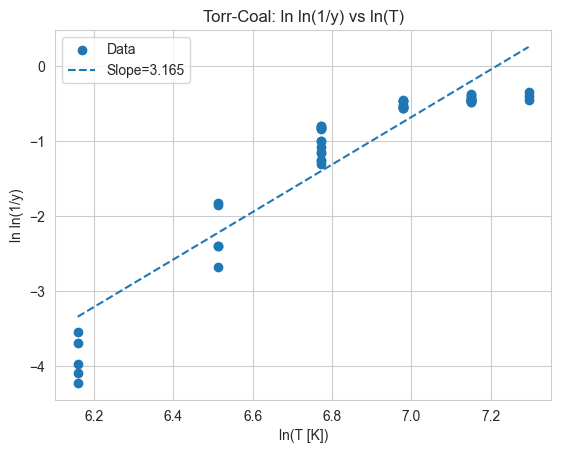

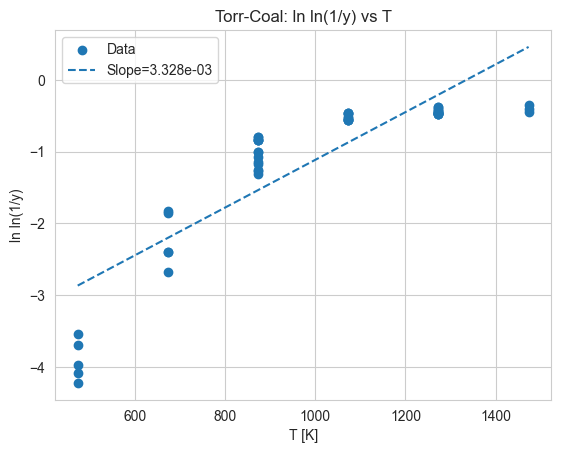

C:\Users\demir\PycharmProjects\volatile-predict\.venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8315 (\N{SUPERSCRIPT MINUS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


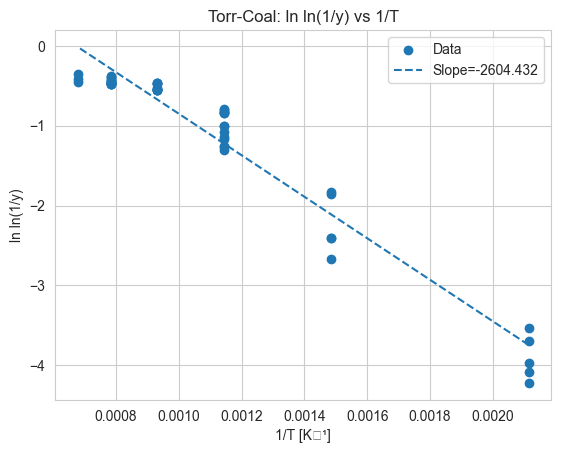

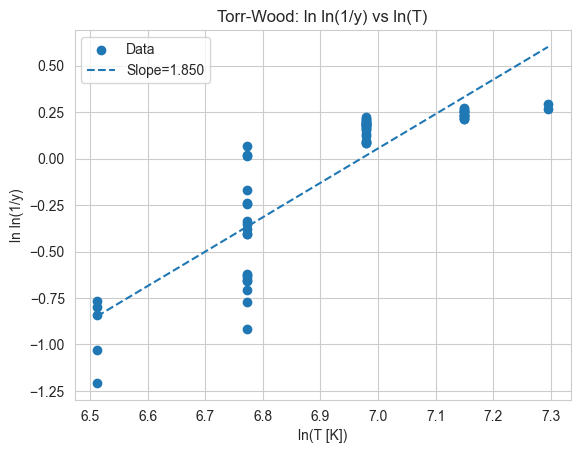

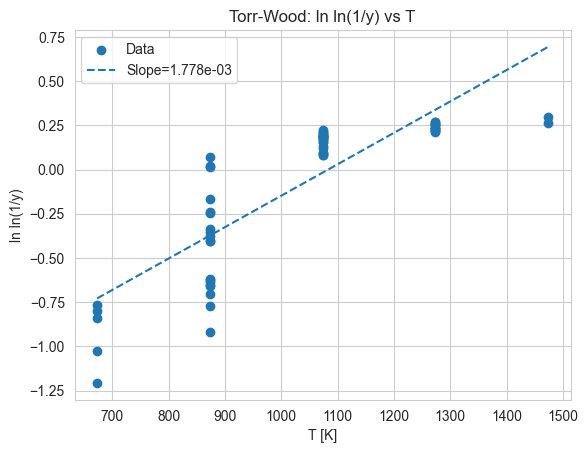

C:\Users\demir\PycharmProjects\volatile-predict\.venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8315 (\N{SUPERSCRIPT MINUS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


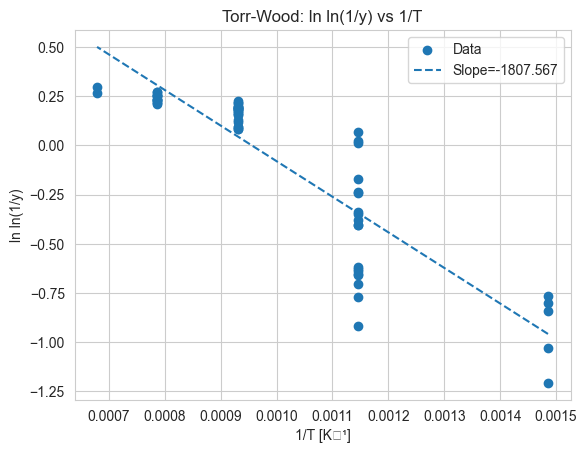

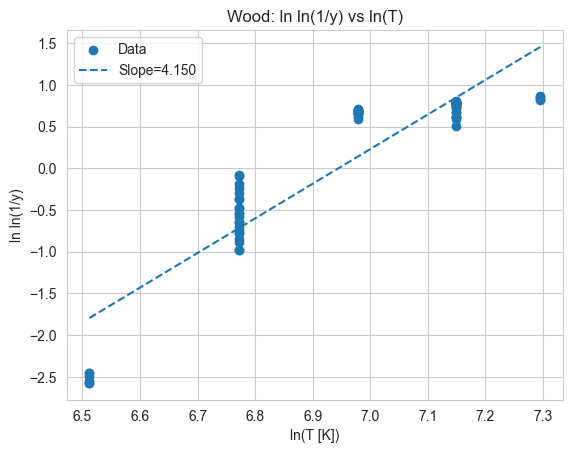

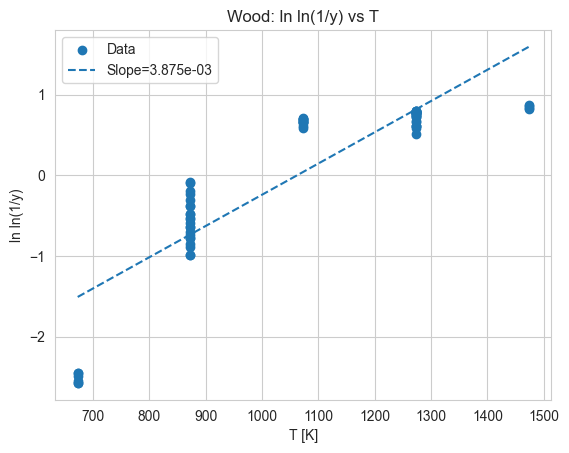

C:\Users\demir\PycharmProjects\volatile-predict\.venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8315 (\N{SUPERSCRIPT MINUS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


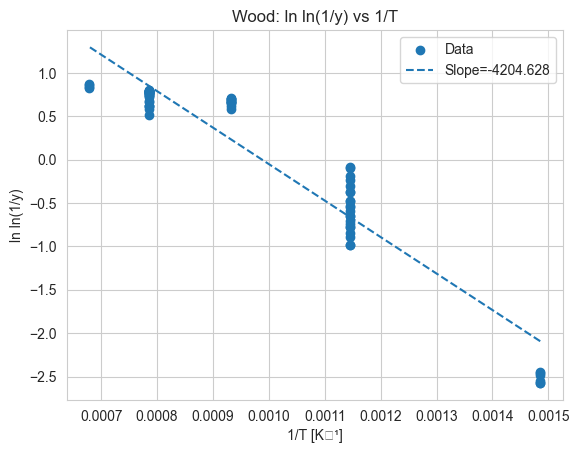

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
# Load data
data_path = r"C:\Users\demir\OneDrive\Desktop\MSc Thesis\Final Results\Final Data Used\feature_engineering_effect\mad_t1_final_data_filtered.csv"
df = pd.read_csv(data_path, delimiter=',')

df = df[(df['pressure'] == 1) & (df['heat_rate'] == 1000) & (df['residence_time'])]
# Define constants
R = 8.314  # J/mol·K

# Compute variables
df["dalpha"] = df["devol_yield"] / 100.0
df["y"] = 1 - df["dalpha"]
df["T_K"] = df["temperature"] + 273.15
df["ln_ln_1_over_y"] = np.log(np.log(1 / df["y"]))
df["ln_T"] = np.log(df["T_K"])
df["inv_T"] = 1 / df["T_K"]

# Initialize results list
results = []

# Loop over fuel types
for fuel_type, group in df.groupby("fuel_type"):
    group = group.dropna(subset=["ln_ln_1_over_y", "T_K", "ln_T", "inv_T"])

    # Estimate Tm = temperature at max devolatilization
    idx_tm = group["dalpha"].idxmax()
    Tm = group.loc[idx_tm, "T_K"]

    # Approx 1: y = a * ln(T) + b  → slope = (E / (R * Tm)) + 1
    res1 = linregress(group["ln_T"], group["ln_ln_1_over_y"])
    E1 = (res1.slope - 1) * R * Tm

    # Approx 2: y = a * T + b  → slope = -E / (R * Tm²)
    res2 = linregress(group["T_K"], group["ln_ln_1_over_y"])
    E2 = -res2.slope * R * Tm**2

    # Approx 3: y = a * (1/T) + b  → slope = -E / R
    res3 = linregress(group["inv_T"], group["ln_ln_1_over_y"])
    E3 = (-res3.slope * R)/1000

    results.append({
        "fuel_type": fuel_type,
        "Tm [K]": Tm,
        "E3_Broido [J/mol]": E3,
        "R2_3": res3.rvalue**2
    })
    # 1) Plot ln_ln(1/y) vs ln(T)
    res1 = linregress(group["ln_T"], group["ln_ln_1_over_y"])
    plt.figure()
    plt.scatter(group["ln_T"], group["ln_ln_1_over_y"], label="Data")
    plt.plot(group["ln_T"], res1.intercept + res1.slope * group["ln_T"],
             linestyle="--", label=f"Slope={res1.slope:.3f}")
    plt.title(f"{fuel_type}: ln ln(1/y) vs ln(T)")
    plt.xlabel("ln(T [K])")
    plt.ylabel("ln ln(1/y)")
    plt.legend()
    plt.show()

    # 2) Plot ln_ln(1/y) vs T (K)
    res2 = linregress(group["T_K"], group["ln_ln_1_over_y"])
    plt.figure()
    plt.scatter(group["T_K"], group["ln_ln_1_over_y"], label="Data")
    plt.plot(group["T_K"], res2.intercept + res2.slope * group["T_K"],
             linestyle="--", label=f"Slope={res2.slope:.3e}")
    plt.title(f"{fuel_type}: ln ln(1/y) vs T")
    plt.xlabel("T [K]")
    plt.ylabel("ln ln(1/y)")
    plt.legend()
    plt.show()

    # 3) Plot ln_ln(1/y) vs 1/T
    res3 = linregress(group["inv_T"], group["ln_ln_1_over_y"])
    plt.figure()
    plt.scatter(group["inv_T"], group["ln_ln_1_over_y"], label="Data")
    plt.plot(group["inv_T"], res3.intercept + res3.slope * group["inv_T"],
             linestyle="--", label=f"Slope={res3.slope:.3f}")
    plt.title(f"{fuel_type}: ln ln(1/y) vs 1/T")
    plt.xlabel("1/T [K⁻¹]")
    plt.ylabel("ln ln(1/y)")
    plt.legend()
    plt.show()


# Display
broido_results_df = pd.DataFrame(results)

In [38]:
print(broido_results_df)

        fuel_type   Tm [K]  E3_Broido [J/mol]      R2_3
0       Cellulose  1273.15          30.584503  0.872939
1       Digestate  1473.15           9.802196  0.634929
2    Digestate_PE  1073.15          29.079378  0.814882
3    Digestate_PP  1073.15          22.858906  0.775271
4   Digestate_SCP  1273.15          18.358066  0.717230
5         HTC-MSW  1273.15          17.642030  0.853926
6   Hemicellulose   873.15          30.143027  0.734191
7          Lignin  1273.15          24.637931  0.958895
8         Lignite  1273.15          43.055271  0.766243
9            RDF1  1273.15           2.356659  0.112957
10           RDF2  1073.15          19.643112  0.697244
11         Rubber  1073.15          -1.192160  0.026255
12         Sewage  1473.15          22.414627  0.784023
13      Torr-Coal  1473.15          21.653246  0.943854
14      Torr-Wood  1473.15          15.028116  0.783590
15           Wood  1473.15          34.957274  0.904610


In [29]:
df["Ea"] = broido_results_df["E3_Broido [J/mol]"]

KeyError: 'Ea'

In [20]:
df.head()

,Unnamed: 0,sample,wc,vm,fc,ac,c,h,o,n,...,fuel_type,fuel_category,devol_yield,dalpha,y,T_K,ln_ln_1_over_y,ln_T,inv_T,Ea
0,1571,cel_18,5.725,87.900500,6.374500,0.00,40.305405,4.517670,54.860844,0.269662,...,Cellulose,Biomass,2.018886,0.020189,0.979811,473.15,-3.892444,6.159412,0.002113,29.981580
1,1572,cel_19,5.725,87.900500,6.374500,0.00,40.305405,4.517670,54.860844,0.269662,...,Cellulose,Biomass,2.324709,0.023247,0.976753,473.15,-3.749837,6.159412,0.002113,8.648349
4,1441,htc_152,7.345,48.240000,6.900000,37.52,33.085000,3.265000,16.600000,1.877000,...,HTC-MSW,Biomass,2.878561,0.028786,0.971214,473.15,-3.533311,6.159412,0.002113,24.235601
5,1566,htc_152,7.345,48.240000,6.900000,37.52,33.085000,3.265000,16.600000,1.877000,...,HTC-MSW,Biomass,2.878561,0.028786,0.971214,473.15,-3.533311,6.159412,0.002113,22.941881
6,1612,hc_1,5.200,91.735674,3.064326,0.00,39.465361,5.214476,54.936839,0.309855,...,Hemicellulose,Biomass,1.415701,0.014157,0.985843,473.15,-4.250424,6.159412,0.002113,29.370227


In [4]:
import pandas as pd
import numpy as np
from scipy.stats import linregress

# ----------------------------------------------------------------------
# LOAD DATA (no pre‐filtering on conditions)
# ----------------------------------------------------------------------
data_path = r"C:\Users\demir\OneDrive\Desktop\MSc Thesis\Final Results\Final Data Used\feature_engineering_effect\mad_t1_final_data_filtered.csv"
df = pd.read_csv(data_path, delimiter=',')

# ----------------------------------------------------------------------
# COMPUTE TRANSFORMED VARIABLES FOR BROIDO PLOT
# ----------------------------------------------------------------------
R = 8.314  # J/mol·K
df["dalpha"]        = df["devol_yield"] / (100.0 - df["ac"])
df["y"]             = 1.0 - df["dalpha"]
df["T_kelvin"]      = df["temperature"] + 273.15
df["ln_ln_1_over_y"]= np.log(np.log(1.0 / df["y"]))
df["inv_T"]         = 1.0 / df["T_kelvin"]

# ----------------------------------------------------------------------
# 1) Estimate E_A for each (fuel_type, heat_rate, pressure, residence_time)
# ----------------------------------------------------------------------
comb_results = []
for (fuel, hr, pres, rt), grp in df.groupby(
        ["fuel_type","heat_rate","pressure","residence_time"]
    ):
    grp = grp.dropna(subset=["ln_ln_1_over_y","inv_T"])
    # need at least 3 points, and inv_T must vary
    if len(grp) < 3 or grp["inv_T"].nunique() < 2:
        continue

    res = linregress(grp["inv_T"], grp["ln_ln_1_over_y"])
    E_kJmol = -res.slope * R / 1000.0

    comb_results.append({
        "fuel_type":       fuel,
        "heat_rate":       hr,
        "pressure":        pres,
        "residence_time":  rt,
        "E_A_kJ_per_mol":  E_kJmol,
        "R2":              res.rvalue**2
    })

comb_df = pd.DataFrame(comb_results)

# ----------------------------------------------------------------------
# 2) Average E_A over all condition‐combinations for each fuel_type
# ----------------------------------------------------------------------
fuel_EA = (
    comb_df
    .groupby("fuel_type", as_index=False)["E_A_kJ_per_mol"]
    .mean()
    .rename(columns={"E_A_kJ_per_mol":"E_A"})
)

# ----------------------------------------------------------------------
# 3) Merge average activation energy back into the main DataFrame
# ----------------------------------------------------------------------
df = df.merge(fuel_EA, on="fuel_type", how="left").drop(['T_kelvin', 'ln_ln_1_over_y', 'inv_T', 'dalpha', 'y'], axis=1)

# Now df["E_A_avg_kJ_per_mol"] holds your fuel‐specific Broido activation energy


C:\Users\demir\PycharmProjects\volatile-predict\.venv\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [5]:
df.to_csv(r"C:\Users\demir\OneDrive\Desktop\MSc Thesis\!Data_Ea\mad_t1_Ea.csv", index=False)

In [6]:
df.head()

,Unnamed: 0,sample,wc,vm,fc,ac,c,h,o,n,...,oc,lhv,temperature,residence_time,pressure,heat_rate,fuel_type,fuel_category,devol_yield,E_A
0,1571,cel_18,5.725,87.9005,6.3745,0.00,40.305405,4.51767,54.860844,0.269662,...,1.020847,16.51605,200,1.0,1.0,1000,Cellulose,Biomass,2.018886,29.981580
1,1572,cel_19,5.725,87.9005,6.3745,0.00,40.305405,4.51767,54.860844,0.269662,...,1.020847,16.51605,200,1.0,1.0,1000,Cellulose,Biomass,2.324709,29.981580
2,1438,htc_9,7.345,48.2400,6.9000,37.52,33.085000,3.26500,16.600000,1.877000,...,0.400000,13.52800,200,0.5,1.0,1000,HTC-MSW,Biomass,11.277050,9.801191
3,1440,htc_96,7.345,48.2400,6.9000,37.52,33.085000,3.26500,16.600000,1.877000,...,0.400000,13.52800,200,0.5,1.0,1000,HTC-MSW,Biomass,6.785137,9.801191
4,1441,htc_152,7.345,48.2400,6.9000,37.52,33.085000,3.26500,16.600000,1.877000,...,0.400000,13.52800,200,1.0,1.0,1000,HTC-MSW,Biomass,2.878561,9.801191


In [10]:
fuel_EA

,fuel_type,E_A
0,Cellulose,29.981580
1,Digestate,5.166541
2,Digestate_PE,33.287805
3,Digestate_PP,27.346881
4,Digestate_SCP,20.144838
5,HTC-MSW,9.801191
6,Hemicellulose,29.370227
7,Lignin,24.640300
8,Lignite,53.747199
9,RDF1,0.205114
